In [1]:
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_stemming.pkl')
dfNo = pd.read_pickle(r'D:\JupyterNotebook\DataProcess\preprocess_SWsastrawi_nostemming360.pkl')

In [ ]:
train_s, test_s = [],[]
for n in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_s.append(knn.score(X_train,y_train))
    test_s.append(knn.score(X_test,y_test))
plt.plot(range(1,50,2),train_s,label='train')
plt.plot(range(1,50,2),test_s,label='test')
plt.legend()
print(f"Max test score: {np.max(test_s)}")
print(f"Best n neightbor: {np.argmax(test_s)+1}")

In [ ]:
test_s

In [87]:
kf = KFold(n_splits=10)
haha = []
i = 1
for train_index, test_index in kf.split(df):
#     print(test_index)
#     print(train_index[0],"-",train_index[len(train_index)-1])
    print(test_index[0],"+",test_index[len(test_index)-1])
    X_train = df['text'].iloc[train_index[0]:train_index[len(train_index)-1]]
    X_test = df['text'].iloc[test_index[0]:test_index[len(test_index)-1]]
    y_train = df['label'].iloc[train_index[0]:train_index[len(train_index)-1]].astype('int')
    y_test = df['label'].iloc[test_index[0]:test_index[len(test_index)-1]].astype('int')
    
#     vectorizer = TfidfVectorizer()
#     X_train = vectorizer.fit_transform(X_train)
#     X_test = vectorizer.transform(X_test)
    counter = CountVectorizer(min_df=3,
                              dtype=np.double)
    counter.fit(X_train)
    X_train = counter.transform(X_train)
    X_test = counter.transform(X_test)
    
    transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    tem1 = vectorizer.get_feature_names()
    fk = int(len(tem1))
    k = round((i/10)*fk)
    
    X_train,X_test = select_features(X_train, y_train, X_test,k)
    
    modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
    modelknn2.fit(X_train,y_train)
    y_pred = modelknn2.predict(X_test)
#     print(classification_report(y_test,y_pred))
    result = modelknn2.score(X_test, y_test)
    haha.append(result)
    print("Fold ke-",i,"=",result)
    print("----------------")
    i+=1

xx = 0
for i in range(len(haha)):
    xx = xx + haha[i]
print(xx/len(haha))

0 + 107
Fold ke- 1 = 0.40186915887850466
----------------
108 + 215
Fold ke- 2 = 0.5794392523364486
----------------
216 + 323
Fold ke- 3 = 0.5514018691588785
----------------
324 + 431
Fold ke- 4 = 0.7289719626168224
----------------
432 + 539
Fold ke- 5 = 0.7476635514018691
----------------
540 + 647
Fold ke- 6 = 0.8317757009345794
----------------
648 + 755
Fold ke- 7 = 0.794392523364486
----------------
756 + 863
Fold ke- 8 = 0.8504672897196262
----------------
864 + 971
Fold ke- 9 = 0.8130841121495327
----------------
972 + 1079
Fold ke- 10 = 0.7850467289719626
----------------
0.708411214953271


In [3]:
def split(strt,fnsh,df):
    X_test = df['text'].iloc[strt:fnsh]
    y_test = df['label'].iloc[strt:fnsh].astype('int')
    df = df.drop(df.index[strt:fnsh])
    X_train = df['text']
    y_train = df['label'].astype('int')    
    return X_train, X_test, y_train, y_test

In [4]:
def select_features(train_X, train_y, test_X,k):
#     total fitur 7343
# 2004
# 1802 nltk
# 2599 sastrawi 1967
    selector = SelectKBest(chi2, k=k)
    selector.fit(train_X, train_y)
#     new = selector.fit_transform(train_X, train_y)
#     print(new.shape)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X

In [5]:
def classifier(df,distance_name,k_neighbor):
    print("Nama distance=",distance_name)
    print("Jumlah K tetangga=",k_neighbor)
#     360
    spl = [0,36,72,108,144,180,216,252,288,324,360]
#     960
#     spl = [0,96,192,288,384,480,576,672,768,864,960]
#     1080
#     spl = [0,108,216,324,432,540,648,756,864,972,1080]
    tempspl = []
    acc_score = []
    i = 0
    akurasimax=0
    while (i<len(spl)-1):
        if len(spl)-2 != len(tempspl):
            X_train, X_test, y_train, y_test = split(spl[i],spl[i+2],df)
            tempspl.append(spl[i])
    #   ketika array[i+2] == null (looping terakhir)
        elif (len(spl)-len(tempspl)) == 2:
    #       split last and first
            X_test1 = df['text'].iloc[spl[i]:spl[i+1]]
            y_test1 = df['label'].iloc[spl[i]:spl[i+1]].astype('int')
            X_test2 = df['text'].iloc[tempspl[0]:tempspl[1]]
            y_test2 = df['label'].iloc[tempspl[0]:tempspl[1]].astype('int')
    #       concat last and first
            X_test = pd.concat([X_test1, X_test2], axis=0)
            y_test = pd.concat([y_test1, y_test2], axis=0)
    #       split except last and first
            X_train = df['text'].iloc[tempspl[1]:tempspl[len(tempspl)-1]]
            y_train = df['label'].iloc[tempspl[1]:tempspl[len(tempspl)-1]].astype('int')
        
#         vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)

#         counter = CountVectorizer(min_df=3,
#                               dtype=np.double)
#         counter.fit(X_train)
#         X_train = counter.transform(X_train)
#         X_test = counter.transform(X_test)

#         transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
#         X_train = transformer.fit_transform(X_train)
#         X_test = transformer.transform(X_test)
#         X_train,X_test = select_features(X_train, y_train, X_test,k)

        modelknn = KNeighborsClassifier(n_neighbors=k_neighbor, weights='uniform', metric=distance_name)
        modelknn.fit(X_train,y_train)
        y_pred = modelknn.predict(X_test)
#         print(classification_report(y_test,y_pred))
        result = modelknn.score(X_test, y_test)
        acc = accuracy_score(y_pred, y_test)
        acc_score.append(acc)
        print("Fold ke-",i+1,"=",result) 
#         ,"//",acc)
        if (result >= akurasimax):
            akurasimax = result
            foldke = i+1
        i+=1
    avg_acc_score = sum(acc_score)/10
    print('Avg accuracy : {}'.format(avg_acc_score))
    print("Akurasi terbaik adalah",akurasimax,"pada fold ke-",foldke)
    print("------------------------------------")
    return akurasimax

Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 0.5833333333333334
Fold ke- 2 = 0.6111111111111112
Fold ke- 3 = 0.5555555555555556
Fold ke- 4 = 0.6111111111111112
Fold ke- 5 = 0.6527777777777778
Fold ke- 6 = 0.6388888888888888
Fold ke- 7 = 0.5694444444444444
Fold ke- 8 = 0.5972222222222222
Fold ke- 9 = 0.5694444444444444
Fold ke- 10 = 0.5416666666666666
Avg accuracy : 0.5930555555555557
Akurasi terbaik adalah 0.6527777777777778 pada fold ke- 5
------------------------------------
Dengan Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.5972222222222222
Fold ke- 2 = 0.5416666666666666
Fold ke- 3 = 0.5416666666666666
Fold ke- 4 = 0.5694444444444444
Fold ke- 5 = 0.6111111111111112
Fold ke- 6 = 0.5972222222222222
Fold ke- 7 = 0.5138888888888888
Fold ke- 8 = 0.5833333333333334
Fold ke- 9 = 0.5555555555555556
Fold ke- 10 = 0.5138888888888888
Avg accuracy : 0.5625
Akurasi terbaik adalah 0.6111111111111112 pada fold ke- 5
-------------------------

Fold ke- 3 = 0.5416666666666666
Fold ke- 4 = 0.5694444444444444
Fold ke- 5 = 0.6111111111111112
Fold ke- 6 = 0.5972222222222222
Fold ke- 7 = 0.5138888888888888
Fold ke- 8 = 0.5833333333333334
Fold ke- 9 = 0.5555555555555556
Fold ke- 10 = 0.5138888888888888
Avg accuracy : 0.5625
Akurasi terbaik adalah 0.6111111111111112 pada fold ke- 5
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 5
Fold ke- 1 = 0.7083333333333334
Fold ke- 2 = 0.6388888888888888
Fold ke- 3 = 0.6388888888888888
Fold ke- 4 = 0.625
Fold ke- 5 = 0.6111111111111112
Fold ke- 6 = 0.6388888888888888
Fold ke- 7 = 0.5694444444444444
Fold ke- 8 = 0.5138888888888888
Fold ke- 9 = 0.5694444444444444
Fold ke- 10 = 0.5972222222222222
Avg accuracy : 0.6111111111111112
Akurasi terbaik adalah 0.7083333333333334 pada fold ke- 1
------------------------------------
Dengan Stemming
Nama distance= minkowski
Jumlah K tetangga= 7
Fold ke- 1 = 0.6666666666666666
Fold ke- 2 = 0.6666666666666666
F

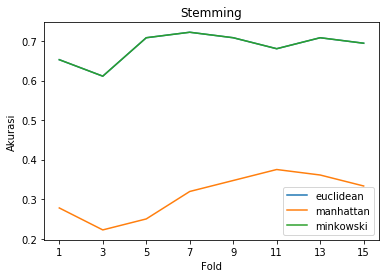

Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 1
Fold ke- 1 = 0.5972222222222222
Fold ke- 2 = 0.5833333333333334
Fold ke- 3 = 0.5972222222222222
Fold ke- 4 = 0.6527777777777778
Fold ke- 5 = 0.5972222222222222
Fold ke- 6 = 0.6111111111111112
Fold ke- 7 = 0.5833333333333334
Fold ke- 8 = 0.5833333333333334
Fold ke- 9 = 0.5138888888888888
Fold ke- 10 = 0.5277777777777778
Avg accuracy : 0.5847222222222223
Akurasi terbaik adalah 0.6527777777777778 pada fold ke- 4
------------------------------------
Tanpa Stemming
Nama distance= euclidean
Jumlah K tetangga= 3
Fold ke- 1 = 0.5833333333333334
Fold ke- 2 = 0.5833333333333334
Fold ke- 3 = 0.5555555555555556
Fold ke- 4 = 0.625
Fold ke- 5 = 0.6111111111111112
Fold ke- 6 = 0.5833333333333334
Fold ke- 7 = 0.5555555555555556
Fold ke- 8 = 0.5138888888888888
Fold ke- 9 = 0.5555555555555556
Fold ke- 10 = 0.5
Avg accuracy : 0.5666666666666667
Akurasi terbaik adalah 0.625 pada fold ke- 4
------------------------------------
Tanpa Stemming
Nama

Fold ke- 8 = 0.5833333333333334
Fold ke- 9 = 0.5138888888888888
Fold ke- 10 = 0.5277777777777778
Avg accuracy : 0.5847222222222223
Akurasi terbaik adalah 0.6527777777777778 pada fold ke- 4
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 3
Fold ke- 1 = 0.5833333333333334
Fold ke- 2 = 0.5833333333333334
Fold ke- 3 = 0.5555555555555556
Fold ke- 4 = 0.625
Fold ke- 5 = 0.6111111111111112
Fold ke- 6 = 0.5833333333333334
Fold ke- 7 = 0.5555555555555556
Fold ke- 8 = 0.5138888888888888
Fold ke- 9 = 0.5555555555555556
Fold ke- 10 = 0.5
Avg accuracy : 0.5666666666666667
Akurasi terbaik adalah 0.625 pada fold ke- 4
------------------------------------
Tanpa Stemming
Nama distance= minkowski
Jumlah K tetangga= 5
Fold ke- 1 = 0.6388888888888888
Fold ke- 2 = 0.625
Fold ke- 3 = 0.6944444444444444
Fold ke- 4 = 0.6666666666666666
Fold ke- 5 = 0.6388888888888888
Fold ke- 6 = 0.6805555555555556
Fold ke- 7 = 0.5694444444444444
Fold ke- 8 = 0.5138888888888888


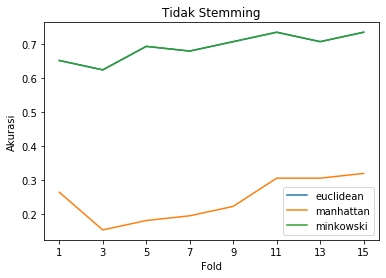

Lama Proses 90.64613103866577 seconds
Wall time: 1min 30s


In [12]:
%%time
# %%capture cap --no-stderr
start_time = time.time()
dfcount = [df,dfNo]
distancecount = ['euclidean','manhattan','minkowski']
kcount = [1,3,5,7,9,11,13,15]
for x in range(2):
    arrd1 = []
    arrd2 = []
    arrd3 = []
    for y in range(len(distancecount)):
        maxresult = []
        for z in range(len(kcount)):
            if x==0:
                print('Dengan Stemming')
            else:
                print('Tanpa Stemming')
            tempmax = classifier(dfcount[x],distancecount[y],kcount[z])
            maxresult.append(tempmax)
            if y==0:
                arrd1.append(tempmax)
            elif y==1:
                arrd2.append(tempmax)
            elif y==2:
                arrd3.append(tempmax)
#         tapi fold yang dipakai beda beda
    plt.plot(kcount, arrd1, label = "euclidean")
    plt.plot(kcount, arrd2, label = "manhattan")
    plt.plot(kcount, arrd3, label = "minkowski")
    plt.xticks(kcount)
    if x==0:
        plt.title("Stemming")
    else:
        plt.title("Tidak Stemming")
    plt.xlabel('Fold')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.pause(0.05)
plt.show
print("Lama Proses %s seconds" % (time.time() - start_time))
# with open('5000_fitur_SWnltkv2.txt', 'w') as f:
#     f.write(cap.stdout)

In [ ]:
df.text.loc[0]

# try--

In [6]:
def asd(df):
    X_train, X_test, y_train, y_test = split(540,756,df)
    return X_train, X_test, y_train, y_test

In [7]:
def fclas(df):
    X_train, X_test, y_train, y_test = split(540,756,df)
    vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    tem1 = vectorizer.get_feature_names()
    fk = int(len(tem1))
    i = 1
    arrplt,arri = [],[]
    while (i<=10):
        k = round((i/10)*fk)
        X_train, X_test, y_train, y_test = asd(df)
        vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train,X_test = select_features(X_train, y_train, X_test,k)
        modelknn2 = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='euclidean')
        modelknn2.fit(X_train,y_train)
        y_pred = modelknn2.predict(X_test)
        persen = i/10*100
        print("Klasifikasi dengan",k,"fitur /",persen,"%")
        print(classification_report(y_test,y_pred))
        result = modelknn2.score(X_test, y_test)
        print("Akurasi=",result)
        arri.append(persen)
        arrplt.append(result)
        print("----------------------------------------------------------------")
        i+=1
    plt.plot(arri, arrplt, label = "Seleksi Fitur")
    plt.xticks(arri)
    plt.xlabel('Banyak fitur (dalam persen)')
    plt.ylabel('Akurasi')
    plt.show()

In [ ]:
dff = [df,dfNo]
for i in range(2):
    fclas(dff[i])

In [53]:
X_train, X_test, y_train, y_test = split(540,756,df)

In [ ]:
print(len(X_train))

In [ ]:
X_train = df['text'].iloc[108:]
X_test = df['text'].iloc[:192]
y_train = df['label'].iloc[192:].astype('int')
y_test = df['label'].iloc[:192].astype('int')

In [43]:
X = df['text']
y = df['label'].astype('int')
# X = dfNo['text']
# y = dfNo['label'].astype('int')

In [54]:
# Pembentukan tf-idf untuk pembobotan
# X_train, X_test, y_train, y_test = split(540,756,df)
vectorizer = TfidfVectorizer(min_df=3, dtype=np.double, norm='l2', sublinear_tf=True)
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X)
# print(X)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# X_train,X_test = select_features(X_train, y_train, X_test)

In [ ]:
X.todense()
# X1.todense()
print(vectorizer.get_feature_names())
tem1 = vectorizer.get_feature_names()
print(tem1)

In [ ]:
print(len(tem1))

In [ ]:
corpus = df['text']

In [ ]:
# print(vectorizer.vocabulary_)
# print(len(vectorizer.get_feature_names()))
df_coba = pd.DataFrame(X.todense().T,
                      index=vectorizer.get_feature_names())
#                       column=[f'D{i+1}' for i in range(len(corpus))])
df_coba

In [56]:
mod = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='euclidean')
cross_val_score(mod,X,y,cv=5)

array([0.63425926, 0.7037037 , 0.77314815, 0.78703704, 0.75462963])

In [60]:
cross_val_score(mod,X,y,cv=10)

array([0.75      , 0.66666667, 0.66666667, 0.76851852, 0.77777778,
       0.81481481, 0.82407407, 0.80555556, 0.7962963 , 0.80555556])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# X_train
X_test

In [103]:
%%time
modelknn2 = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='cosine')
modelknn2.fit(X_train,y_train)

Wall time: 3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [98]:
y_pred = modelknn2.predict(X_test)
y_pred

array([ 0,  3,  2,  3,  4,  5,  6,  7,  8,  9,  2, 11,  0,  1,  4,  3,  7,
        5,  6,  7,  8,  9, 10, 11,  0,  3,  2,  3,  4,  5,  6,  7,  8,  9,
        5, 11,  0,  1,  4,  3,  4,  5,  3,  7,  3,  9, 10,  5,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  5, 10,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  7,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,
        3,  3,  8,  4,  5,  1,  7,  8,  9, 10,  5,  7,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  7,  7, 11,  9, 10,
        4,  0,  3,  2,  3,  4,  5,  6,  7,  3,  9, 10, 11,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  7,  4,  6,  7,  3,
        9, 10, 11,  7,  1,  7,  3,  4,  4,  6,  7,  3,  9, 10, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  3,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
        0,  8,  9,  4, 11,  9,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        0,  1,  2,  3,  5,  5,  6,  7,  3,  9, 10,  1])

In [99]:
modelknn2.predict_proba(X_test)

array([[0.62214342, 0.        , 0.        , ..., 0.11238064, 0.        ,
        0.        ],
       [0.        , 0.26577064, 0.        , ..., 0.11291122, 0.        ,
        0.        ],
       [0.0838363 , 0.        , 0.46840642, ..., 0.11165557, 0.16786532,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.9126704 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1144642 , 0.79861655,
        0.        ],
       [0.0877755 , 0.26691779, 0.08811342, ..., 0.11609403, 0.08911053,
        0.17560118]])

In [100]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0  0  0  1  0  3  0  1  0  0]
 [ 0 13  0  4  0  0  0  0  0  0  1  0]
 [ 0  0 14  1  2  0  0  1  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  1  0  0  0]
 [ 0  0  0  0 15  1  0  2  0  0  0  0]
 [ 0  0  0  0  2 16  0  0  0  0  0  0]
 [ 0  1  0  1  0  0 15  1  0  0  0  0]
 [ 1  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  6  0  0  0  0 11  0  0  1]
 [ 0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  1  0  1  1  0  0  0  0 15  0]
 [ 0  1  0  0  1  2  0  0  0  0  0 14]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.87      0.72      0.79        18
           2       0.93      0.78      0.85        18
           3       0.59      0.94      0.72        18
           4       0.71      0.83      0.77        18
           5       0.76      0.89      0.82        18
           6       1.00      0.83      0.91        18
           7       0.71      0.94      0.81        18
           8       0.92      0.61      0.73        18
           9       0.95      1.00      0.97        18
          10       0.94      0.83      0.88        18
          11       0.93      0.78      0.85        18

    accuracy                           0.82       216
   macro avg       0.85      0.82      0.83       216
weighted avg       0.85      0.82      0.83       216



In [96]:
result = modelknn2.score(X_test, y_test)
print(result)

0.8240740740740741


In [84]:
from sklearn.metrics import precision_score
haha = precision_score(y_test,y_pred,average='weighted')
print(haha)

0.8528475463082996


In [32]:
from sklearn.metrics import recall_score
hehe = recall_score(y_test, y_pred, average='weighted')
print(hehe)

0.2361111111111111


In [33]:
from sklearn.metrics import f1_score
hoho = f1_score(y_test, y_pred, average='weighted')
print(hoho)

0.2189276043145631


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
result_class = pd.DataFrame({'Actual Result':y_test, 'Predicted Result':y_pred})
result_class

,Actual Result,Predicted Result
540,0,0
541,1,3
542,2,2
543,3,3
544,4,4
...,...,...
751,7,7
752,8,3
753,9,9
754,10,10


In [25]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(result_class)